In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [6]:
def rotation(x, y, theta):
    pts = np.array([x,y]).T    
    
    for i in range(0, len(x)):
        # Applying rotation matrix
        pts[i] = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), -np.cos(theta)]]) @ pts[i]
        
    return pts.T[0], pts.T[1]

In [2]:
def rk4_simultaneous(f, r0, t):
    # n is the number of equations
    n = len(r0)
    
    # N is the number of grid points
    N = len(t)
    
    # Step size
    h = (t[-1] - t[0]) / N
    
    # Setup r. Each row takes the form (xi, yi), etc
    r = np.zeros((len(t) ,len(r0)))
    r[0] = r0 # Change zeroth row to initial condition
        
    # RK4 algorithm
    for i in range(0, N-1):
        k1 = h * f(r[i],  t[i])
        k2 = h * f(r[i] + 0.5*k1, t[i] + 0.5*h)
        k3 = h * f(r[i] + 0.5*k2, t[i] + 0.5*h)
        k4 = h * f(r[i] + k3, t[i] + h)
        r[i+1] = r[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        
    return r.T

# System of 2nd-order ODEs

We are interested in equations of the form
\
\
    $$\frac{d^2 \vec{r}}{d t^2} = \vec{f}\left(\vec{r}, \frac{d\vec{r}}{dt}, t\right)$$
\
\
This is equivalent to the system:
\
\
    $$\frac{d\vec{r}}{dt} = \vec{s},\qquad \frac{d\vec{s}}{dt} = \vec{f}(\vec{r}, \vec{s},t)$$

### Example: Spring Pendulum

The equations of motion for a spring pendulum are
\
\
    \begin{align*}
        \ddot{x} &= \left(l + x\right) \dot{\theta}^{2}-\frac{k}{m} x+g \cos \theta\\
        \ddot{\theta} &= -\frac{g}{l + x} \sin \theta-\frac{2 \dot{x}}{l + x} \dot{\theta}
    \end{align*}
\
\
This means that we are solving the following system:
\
\
    \begin{align*}
        \frac{dx}{dt} &= y\\
        \frac{dy}{dt} &= \left(l + x\right) \phi^{2}-\frac{k}{m} x+g \cos \theta\\
        \frac{d\theta}{dt} &= \phi\\
        \frac{d\phi}{dt} &= -\frac{g}{l + x} \sin \theta-\frac{2 y}{l + x} \phi
    \end{align*}

In [ ]:
g = 9.8
l = 3
k = 3 # small k means bigger effect on spring
m = 1

def f(r, t):
    x = r[0]
    y = r[1]
    theta = r[2]
    phi = r[3]
    
    fx = y
    fy = (l + x)*phi**2 - (k/m)*x + g*np.cos(theta)
    ftheta = phi
    fphi = - (g / (l + x)) * np.sin(theta) - (2*y / (l + x)) * phi
    
    return np.array([fx, fy, ftheta, fphi])

In [ ]:
tmin = 0
tmax = 60
N = 600
t = np.linspace(tmin, tmax, N)

r0 = [2, 0, 2 * np.pi / 3, 0] # [initial position, initial speed of x, initial angle, initial angular velocity]
r = rk4_simultaneous(f, r0, t)

# Going back to Cartesian coordinates
x = (l + r[0]) * np.cos(r[2])
y = (l + r[0]) * np.sin(r[2])

# Rotate the axis
x,y = rotation(x, y, theta=3*np.pi/2)

### Animation

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-25, 25), ylim=(-25, 25))
ax.set_aspect('equal')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# No ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])

line, = ax.plot([], [], 'o-', lw=2)
def init():
    line.set_data([], [])
    return line


def animate(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    return line

xlbl = ax.set_xlabel(r'$x$')
ax.xaxis.set_label_coords(1.03, 0.518)


ylbl = ax.set_ylabel(r'$y$')
ylbl.set_rotation(0)
ax.yaxis.set_label_coords(0.5, 1.01)

ani = animation.FuncAnimation(fig, 
                              animate, 
                              range(0, len(y)),
                              interval=100,
                              init_func=init)

In [ ]:
ani.save('animations/spring pendulum.mp4', dpi=200)

### Example: Double Pendulum

The equations of motion are:
\
\
    \begin{align}
        0=&\left(m_{1}+m_{2}\right) l_{1}^{2} \ddot{\theta}_{1} + m_{2} l_{1} l_{2} \ddot{\theta}_{2} \cos \left(\theta_{1} - \theta_{2}\right) + m_{2} l_{1} l_{2} \dot{\theta}_{2}^{2} \sin \left(\theta_{1} - \theta_{2}\right) + \left(m_{1} + m_{2}\right) g l_{1} \sin \theta_{1}\\
        0=& m_{2} l_{2}^{2} \ddot{\theta}_{2} + m_{2} l_{1} l_{2} \ddot{\theta}_{1} \cos \left(\theta_{1} - \theta_{2}\right) -m_{2} l_{1} l_{2} \dot{\theta}_{1}^{2} \sin \left(\theta_{1} - \theta_{2}\right) + m_{2} g l_{2} \sin \theta_{2}
    \end{align}
\
\
We note that the Cartesian coordinates of the masses are  
\
\
\begin{align*}
    (x, y)_{1} &= \left(l_{1} \sin \theta_{1},-l_{1} \cos \theta_{1}\right)\\
    (x, y)_{2} &= \left(l_{1} \sin \theta_{1}+l_{2} \sin \theta_{2},-l_{1} \cos \theta_{1}-l_{2} \cos \theta_{2}\right)
\end{align*}
\
\
We can rearrange this as
\
\
\begin{align}
    \ddot{\theta}_{1} =& - \frac{m_{2} l_{2}}{\left(m_{1}+m_{2}\right) l_{1}}  \ddot{\theta}_{2} \cos \left(\theta_{1} - \theta_{2}\right) - \frac{m_{2} l_{2}}{\left(m_{1}+m_{2}\right) l_{1}}  \dot{\theta}_{2}^{2} \sin \left(\theta_{1} - \theta_{2}\right) - \frac{g}{l_{1}} \sin \theta_{1}\\
    \ddot{\theta}_{2} =&  - \frac{l_{1}}{l_{2}} \ddot{\theta}_{1} \cos \left(\theta_{1} - \theta_{2}\right) + \frac{l_{1}}{l_{2}} \dot{\theta}_{1}^{2} \sin \left(\theta_{1} - \theta_{2}\right) - \frac{g}{l_{2}} \sin \theta_{2}
\end{align}
\
\
We can rewrite this as
\
\
\begin{align}
    \frac{d\theta_1}{dt} &= \phi_1\\
    \frac{d\phi_1}{dt} &= - \frac{m_{2} l_{2}}{\left(m_{1}+m_{2}\right) l_{1}}  \frac{d\phi_2}{dt} \cos \left(\theta_{1} - \theta_{2}\right) - \frac{m_{2} l_{2}}{\left(m_{1}+m_{2}\right) l_{1}}  \phi_2^{2} \sin \left(\theta_{1} - \theta_{2}\right) - \frac{g}{l_{1}} \sin \theta_{1}\\
    \frac{d\theta_2}{dt} &= \phi_2\\
    \frac{d\phi_2}{dt} &= - \frac{l_{1}}{l_{2}} \frac{d\phi_1}{dt}\cos \left(\theta_{1} - \theta_{2}\right) + \frac{l_{1}}{l_{2}} \phi_1^{2} \sin \left(\theta_{1} - \theta_{2}\right) - \frac{g}{l_{2}} \sin \theta_{2}
\end{align}
\
\
We make the appropriate substitutions. Hence,
\
\
\begin{align}
    \frac{d\theta_1}{dt} &= \phi_1\\
    \frac{d\phi_1}{dt} &= \frac{1}{1- \frac{m_{2} }{\left(m_{1}+m_{2}\right)} \cos^2 \left(\theta_{1} - \theta_{2}\right)}\left[- \frac{m_{2}}{\left(m_{1} + m_{2}\right) l_{1}}  \left[l_{1} \phi_1^{2} \sin \left(\theta_{1} - \theta_{2}\right) - g \sin \theta_{2}\right] \cos \left(\theta_{1} - \theta_{2}\right) - \frac{m_{2} l_{2}}{\left(m_{1}+m_{2}\right) l_{1}}  \phi_2^{2} \sin \left(\theta_{1} - \theta_{2}\right) - \frac{g}{l_{1}} \sin \theta_{1}\right]\\
    \frac{d\theta_2}{dt} &= \phi_2\\
    \frac{d\phi_2}{dt} &=  \frac{1}{1 - \frac{m_{2}}{\left(m_{1}+m_{2}\right)} \cos^2 \left(\theta_{1} - \theta_{2}\right)}\left[\left( \frac{m_{2}}{\left(m_{1}+m_{2}\right)}  \phi_2^{2} \sin \left(\theta_{1} - \theta_{2}\right) + \frac{g}{l_{2}} \sin \theta_{1}\right)\cos \left(\theta_{1} - \theta_{2}\right) + \frac{l_{1}}{l_{2}} \phi_1^{2} \sin \left(\theta_{1} - \theta_{2}\right) - \frac{g}{l_{2}} \sin \theta_{2}\right]
\end{align}
\
\
Code:

In [4]:
m1 = 1
m2 = 1
l1 = 1
l2 = 1
g = 9.81

def f(r, t):
    theta1 = r[0]
    phi1 = r[1]
    theta2 = r[2]
    phi2 = r[3]
    
    
    ftheta1 = phi1
    fphi1 = (1 / (1 - (m2 / (m1 + m2))*np.cos(theta1 - theta2)**2)) * (-(m2 / (m1 + m2))*(l1 * phi1**2 * np.sin(theta1 - theta2) - g*np.sin(theta2))*np.cos(theta1 - theta2) - (m2 * l2 / (m1 + m2)) * phi2**2 * np.sin(theta1 - theta2) - (g / l1) * np.sin(theta1) )
    ftheta2 = phi2
    fphi2 = (1 / (1 - (m2 / (m1 + m2))*np.cos(theta1 - theta2)**2)) * ( ((m2 / (m1 + m2))*phi2**2 * np.sin(theta1 - theta2) + (g/l2)*np.sin(theta1))*np.cos(theta1 - theta2) + (l1/l2)*phi1**2 * np.sin(theta1 - theta2) - (g/l2)*np.sin(theta2))
    
    return np.array([ftheta1, fphi1, ftheta2, fphi2])

tmin = 0
tmax = 60
N = 600
t = np.linspace(tmin, tmax, N)

# initial condition: [initial angle m1, initial angular velocity m1, initial angle m2, initial angular velocity m2]
r0 = [2 * np.pi / 3, 0, 2 * np.pi / 3, 0] 
r = rk4_simultaneous(f, r0, t)

# Getting the relevant arrays
theta1 = r[0]
theta2 = r[2]

### Note!

\begin{align*}
    (x, y)_{1} &= \left(l_{1} \sin \theta_{1},-l_{1} \cos \theta_{1}\right)\\
    (x, y)_{2} &= \left(l_{1} \sin \theta_{1}+l_{2} \sin \theta_{2},-l_{1} \cos \theta_{1}-l_{2} \cos \theta_{2}\right)
\end{align*}

In [7]:
x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)

x2 = l1 * np.sin(theta1) + l2*np.sin(theta2)
y2 = -l1 * np.cos(theta1) - l2*np.cos(theta2)


# Rotate
x1,y1 = rotation(x1, y1, theta=3*np.pi/2)
x2,y2 = rotation(x2, y2, theta=3*np.pi/2)

# Animate

<IPython.core.display.Javascript object>


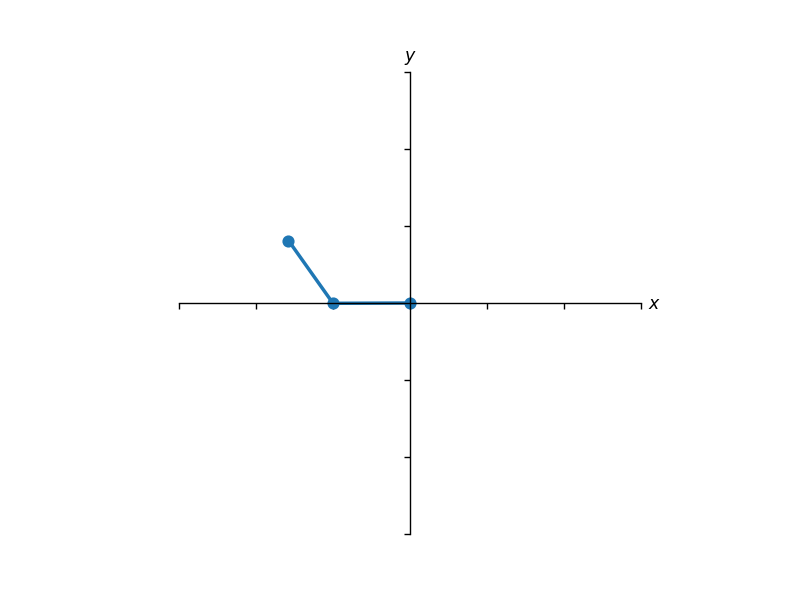

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-3, 3), ylim=(-3, 3))
ax.set_aspect('equal')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# No ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])

line, = ax.plot([], [], 'o-', lw=2)
def init():
    line.set_data([], [])
    return line


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    return line

xlbl = ax.set_xlabel(r'$x$')
ax.xaxis.set_label_coords(1.03, 0.518)


ylbl = ax.set_ylabel(r'$y$')
ylbl.set_rotation(0)
ax.yaxis.set_label_coords(0.5, 1.01)

ani = animation.FuncAnimation(fig, 
                              animate, 
                              range(0, len(y1)),
                              interval=100,
                              init_func=init)

In [10]:
ani.save('animations/double pendulum.mp4', dpi=200)